In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')

%matplotlib inline

In [ ]:
hrnetv2_c1_df = pd.read_csv('../tmp_results/spV2150_hrnetv2.csv')
mb2d_c1dp_df = pd.read_csv('../tmp_results/spV2150_mobilenetv2dilated-c1_deepsup.csv')
res101_ppmdp_df = pd.read_csv('../tmp_results/spV2150_resnet101dilated-ppm_deepsup.csv')
res101_up_df = pd.read_csv('../tmp_results/spV2150_resnet101-upernet.csv')
res18_ppmdp_df = pd.read_csv('../tmp_results/spV2150_resnet18dilated-ppm_deepsup.csv')
res50_ppmdp_df = pd.read_csv('../tmp_results/spV2150_resnet50dilated-ppm_deepsup.csv')
res50_up_df = pd.read_csv('../tmp_results/spV2150_resnet50-upernet.csv')

In [ ]:
hrnetv2_c1_df = pd.read_csv('../tmp_results/spV2100_hrnetv2.csv')
mb2d_c1dp_df = pd.read_csv('../tmp_results/spV2100_mobilenetv2dilated-c1_deepsup.csv')
res101_ppmdp_df = pd.read_csv('../tmp_results/spV2100_resnet101dilated-ppm_deepsup.csv')
res101_up_df = pd.read_csv('../tmp_results/spV2100_resnet101-upernet.csv')
res18_ppmdp_df = pd.read_csv('../tmp_results/spV2100_resnet18dilated-ppm_deepsup.csv')
res50_ppmdp_df = pd.read_csv('../tmp_results/spV2100_resnet50dilated-ppm_deepsup.csv')
res50_up_df = pd.read_csv('../tmp_results/spV2100_resnet50-upernet.csv')

In [ ]:
hrnetv2_c1_df = pd.read_csv('../tmp_results/spV2200_hrnetv2.csv')
mb2d_c1dp_df = pd.read_csv('../tmp_results/spV2200_mobilenetv2dilated-c1_deepsup.csv')
res101_ppmdp_df = pd.read_csv('../tmp_results/spV2200_resnet101dilated-ppm_deepsup.csv')
res101_up_df = pd.read_csv('../tmp_results/spV2200_resnet101-upernet.csv')
res18_ppmdp_df = pd.read_csv('../tmp_results/spV2200_resnet18dilated-ppm_deepsup.csv')
res50_ppmdp_df = pd.read_csv('../tmp_results/spV2200_resnet50dilated-ppm_deepsup.csv')
res50_up_df = pd.read_csv('../tmp_results/spV2200_resnet50-upernet.csv')

In [ ]:
plt.figure(figsize=(13, 9))

plt.plot(hrnetv2_c1_df['amount'].values, hrnetv2_c1_df['PixelAcc'].values, label="hrnetv2-c1")
plt.plot(mb2d_c1dp_df['amount'].values, mb2d_c1dp_df['PixelAcc'].values, label="mobilenetv2dilated-c1_deepsup")
plt.plot(res101_ppmdp_df['amount'].values, res101_ppmdp_df['PixelAcc'].values, label="resnet101dilated-ppm_deepsup")
plt.plot(res101_up_df['amount'].values, res101_up_df['PixelAcc'].values, label="resnet101-upernet")
plt.plot(res18_ppmdp_df['amount'].values, res18_ppmdp_df['PixelAcc'].values, label="resnet18dilated-ppm_deepsup")
plt.plot(res50_ppmdp_df['amount'].values, res50_ppmdp_df['PixelAcc'].values, label="resnet50dilated-ppm_deepsup")
plt.plot(res50_up_df['amount'].values, res50_up_df['PixelAcc'].values, label="resnet50-upernet")


plt.xlabel('Noise Levels (Amount)')
plt.ylabel('Pixel Accuracy')
plt.title('Salt & Pepper Noise (single image)')
plt.tight_layout()
plt.legend()

plt.savefig("../tmp_results/spV2_100.png")
#plt.savefig("../tmp_results/spV2_150.png")
# plt.savefig("../tmp_results/spV2_200.png")

plt.show()

# CPU VS GPU

In [158]:
names = ['hrnetv2\nc1', 'mobilenetv2dilated\nc1_deepsup', 'resnet101dilated\nppm_deepsup', 'resnet101\nupernet', 
        'resnet18dilated\nppm_deepsup', 'resnet50dilated\nppm_deepsup', 'resnet50\nupernet']

gpu_load_time = [0.8317041119998976, 0.08185544600019057, 0.9722921249995125, 1.1342338739996194, 0.3433740279997437, 
                 0.7033942389998629, 0.8720066390005741]
gpu_time = [0.6584389950003242, 0.3087233969999943, 1.1439642240002286, 0, 0.5229989019999266, 
            0.8730596940004034, 0]

cpu_load_time = [0.8361522599998352, 0.08521515199936402, 1.0185269150006206, 1.2080746639994686, 0.3453997340002388, 
                0.7113769529996716, 0.8756012989997544]
cpu_time = [7.313980812999944, 3.6011879489997227, 17.61367605199939, 15.324996708000072, 7.795829454000341, 
           13.314744125000288, 14.013098361999255]

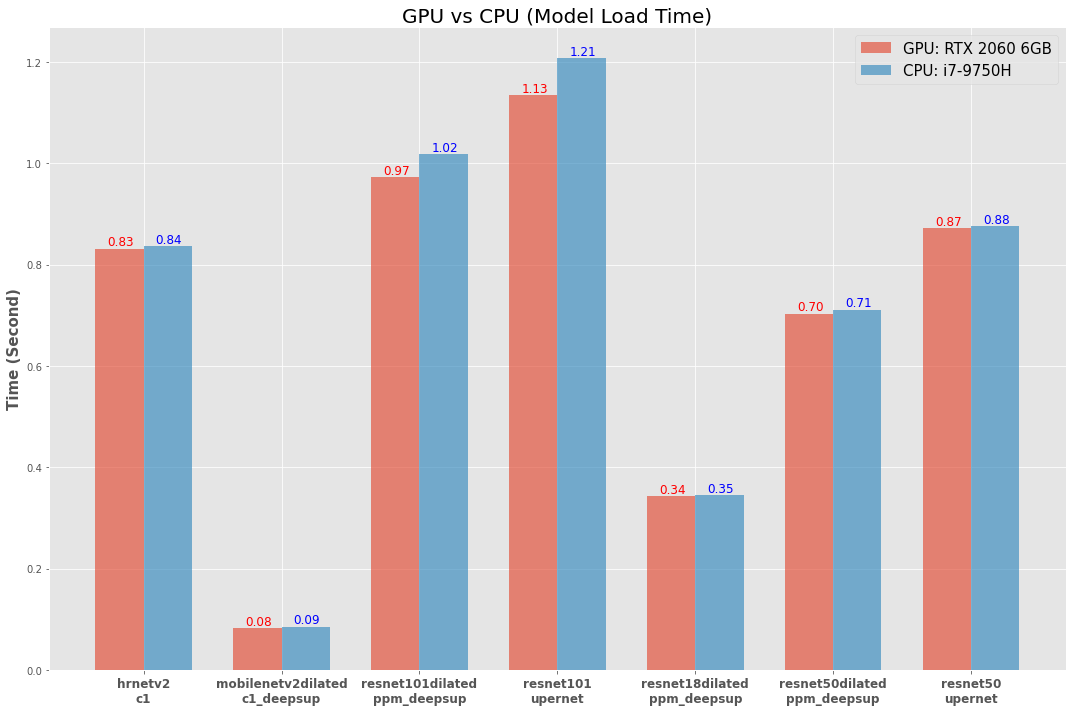

In [159]:
x = np.arange(len(names))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(15, 10))
rects1 = plt.bar(x - width/2, gpu_load_time, width, label='GPU: RTX 2060 6GB', alpha=0.65)
rects2 = plt.bar(x + width/2, cpu_load_time, width, label='CPU: i7-9750H', alpha=0.65)

text_ph = 0.006
for i, v in enumerate(cpu_load_time):
    if v==0:
        ax.text(i-width+width/4, v+text_ph, "error", color='red', fontsize=12)
    else:
        ax.text(i+width/4, v+text_ph, "{:.2f}".format(v), color='blue', fontsize=12)
    
for i, v in enumerate(gpu_load_time):
    if v==0:
        ax.text(i-width+width/4, v+text_ph, "error", color='red', fontsize=12)
    else:
        ax.text(i-width+width/4, v+text_ph, "{:.2f}".format(v), color='red', fontsize=12)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Time (Second)', fontsize=15, fontweight='bold')
# ax.set_xlabel('Models', fontsize=15)
ax.set_title('GPU vs CPU (Model Load Time)', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(names, fontsize=12, fontweight='bold')
# ax.tick_params(labelrotation=0, labelsize='large')
ax.legend(fontsize=15)

fig.tight_layout()

plt.show()

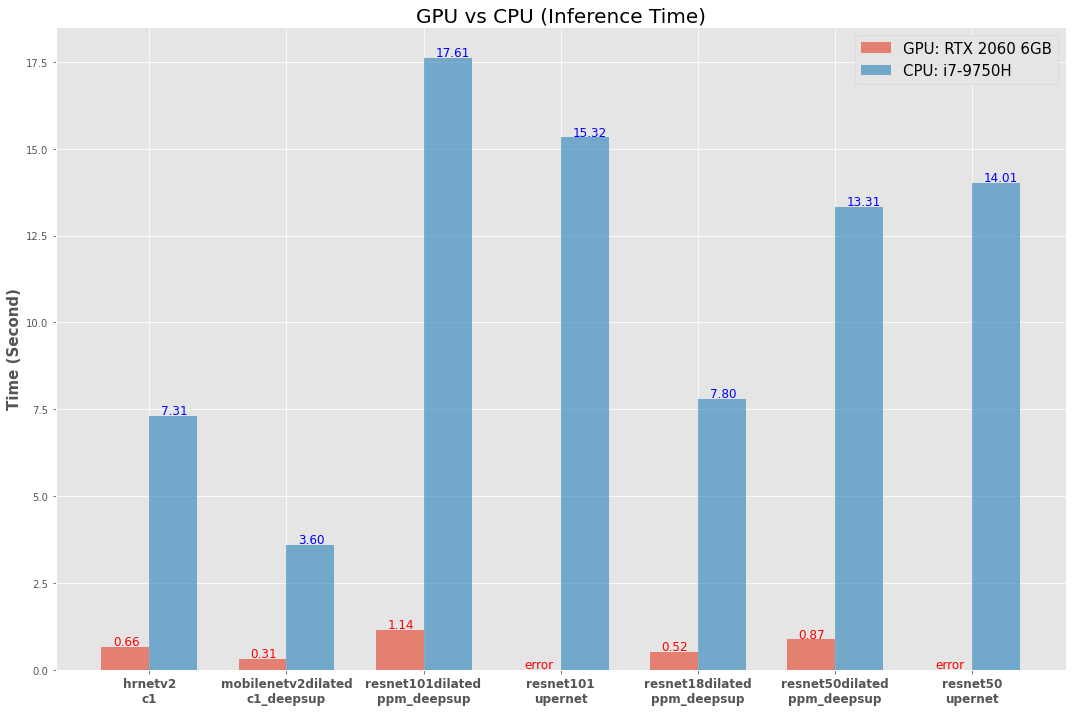

In [157]:
x = np.arange(len(names))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(15, 10))
rects1 = plt.bar(x - width/2, gpu_time, width, label='GPU: RTX 2060 6GB', alpha=0.65)
rects2 = plt.bar(x + width/2, cpu_time, width, label='CPU: i7-9750H', alpha=0.65)

text_ph = 0.05
for i, v in enumerate(cpu_time):
    if v==0:
        ax.text(i-width+width/4, v+text_ph, "error", color='red', fontsize=12)
    else:
        ax.text(i+width/4, v+text_ph, "{:.2f}".format(v), color='blue', fontsize=12)
    
for i, v in enumerate(gpu_time):
    if v==0:
        ax.text(i-width+width/4, v+text_ph, "error", color='red', fontsize=12)
    else:
        ax.text(i-width+width/4, v+text_ph, "{:.2f}".format(v), color='red', fontsize=12)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Time (Second)', fontsize=15, fontweight='bold')
# ax.set_xlabel('Models', fontsize=15)
ax.set_title('GPU vs CPU (Inference Time)', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(names, fontsize=12, fontweight='bold')
# ax.tick_params(labelrotation=0, labelsize='large')
ax.legend(fontsize=15)

fig.tight_layout()

plt.show()